#Import YOLOv5 and Dataset 

In [ ]:
# Import My YOLOv5 Project
!git clone https://github.com/m3gofriends/My-Machine-and-Deep-Learning-Template-main
!unzip '/content/My-Machine-and-Deep-Learning-Template-main/YOLOv5/YOLOv5 Porject/Mask.zip'

In [2]:
# Install YOLOv5
!git clone https://github.com/ultralytics/yolov5 --tag 6.1
!mv /content/6.1 /content/yolov5
%cd /content/yolov5
%pip install -qr requirements.txt

from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/78.2 GB disk)


547685/547685 [==============================] - 0s 0us/step


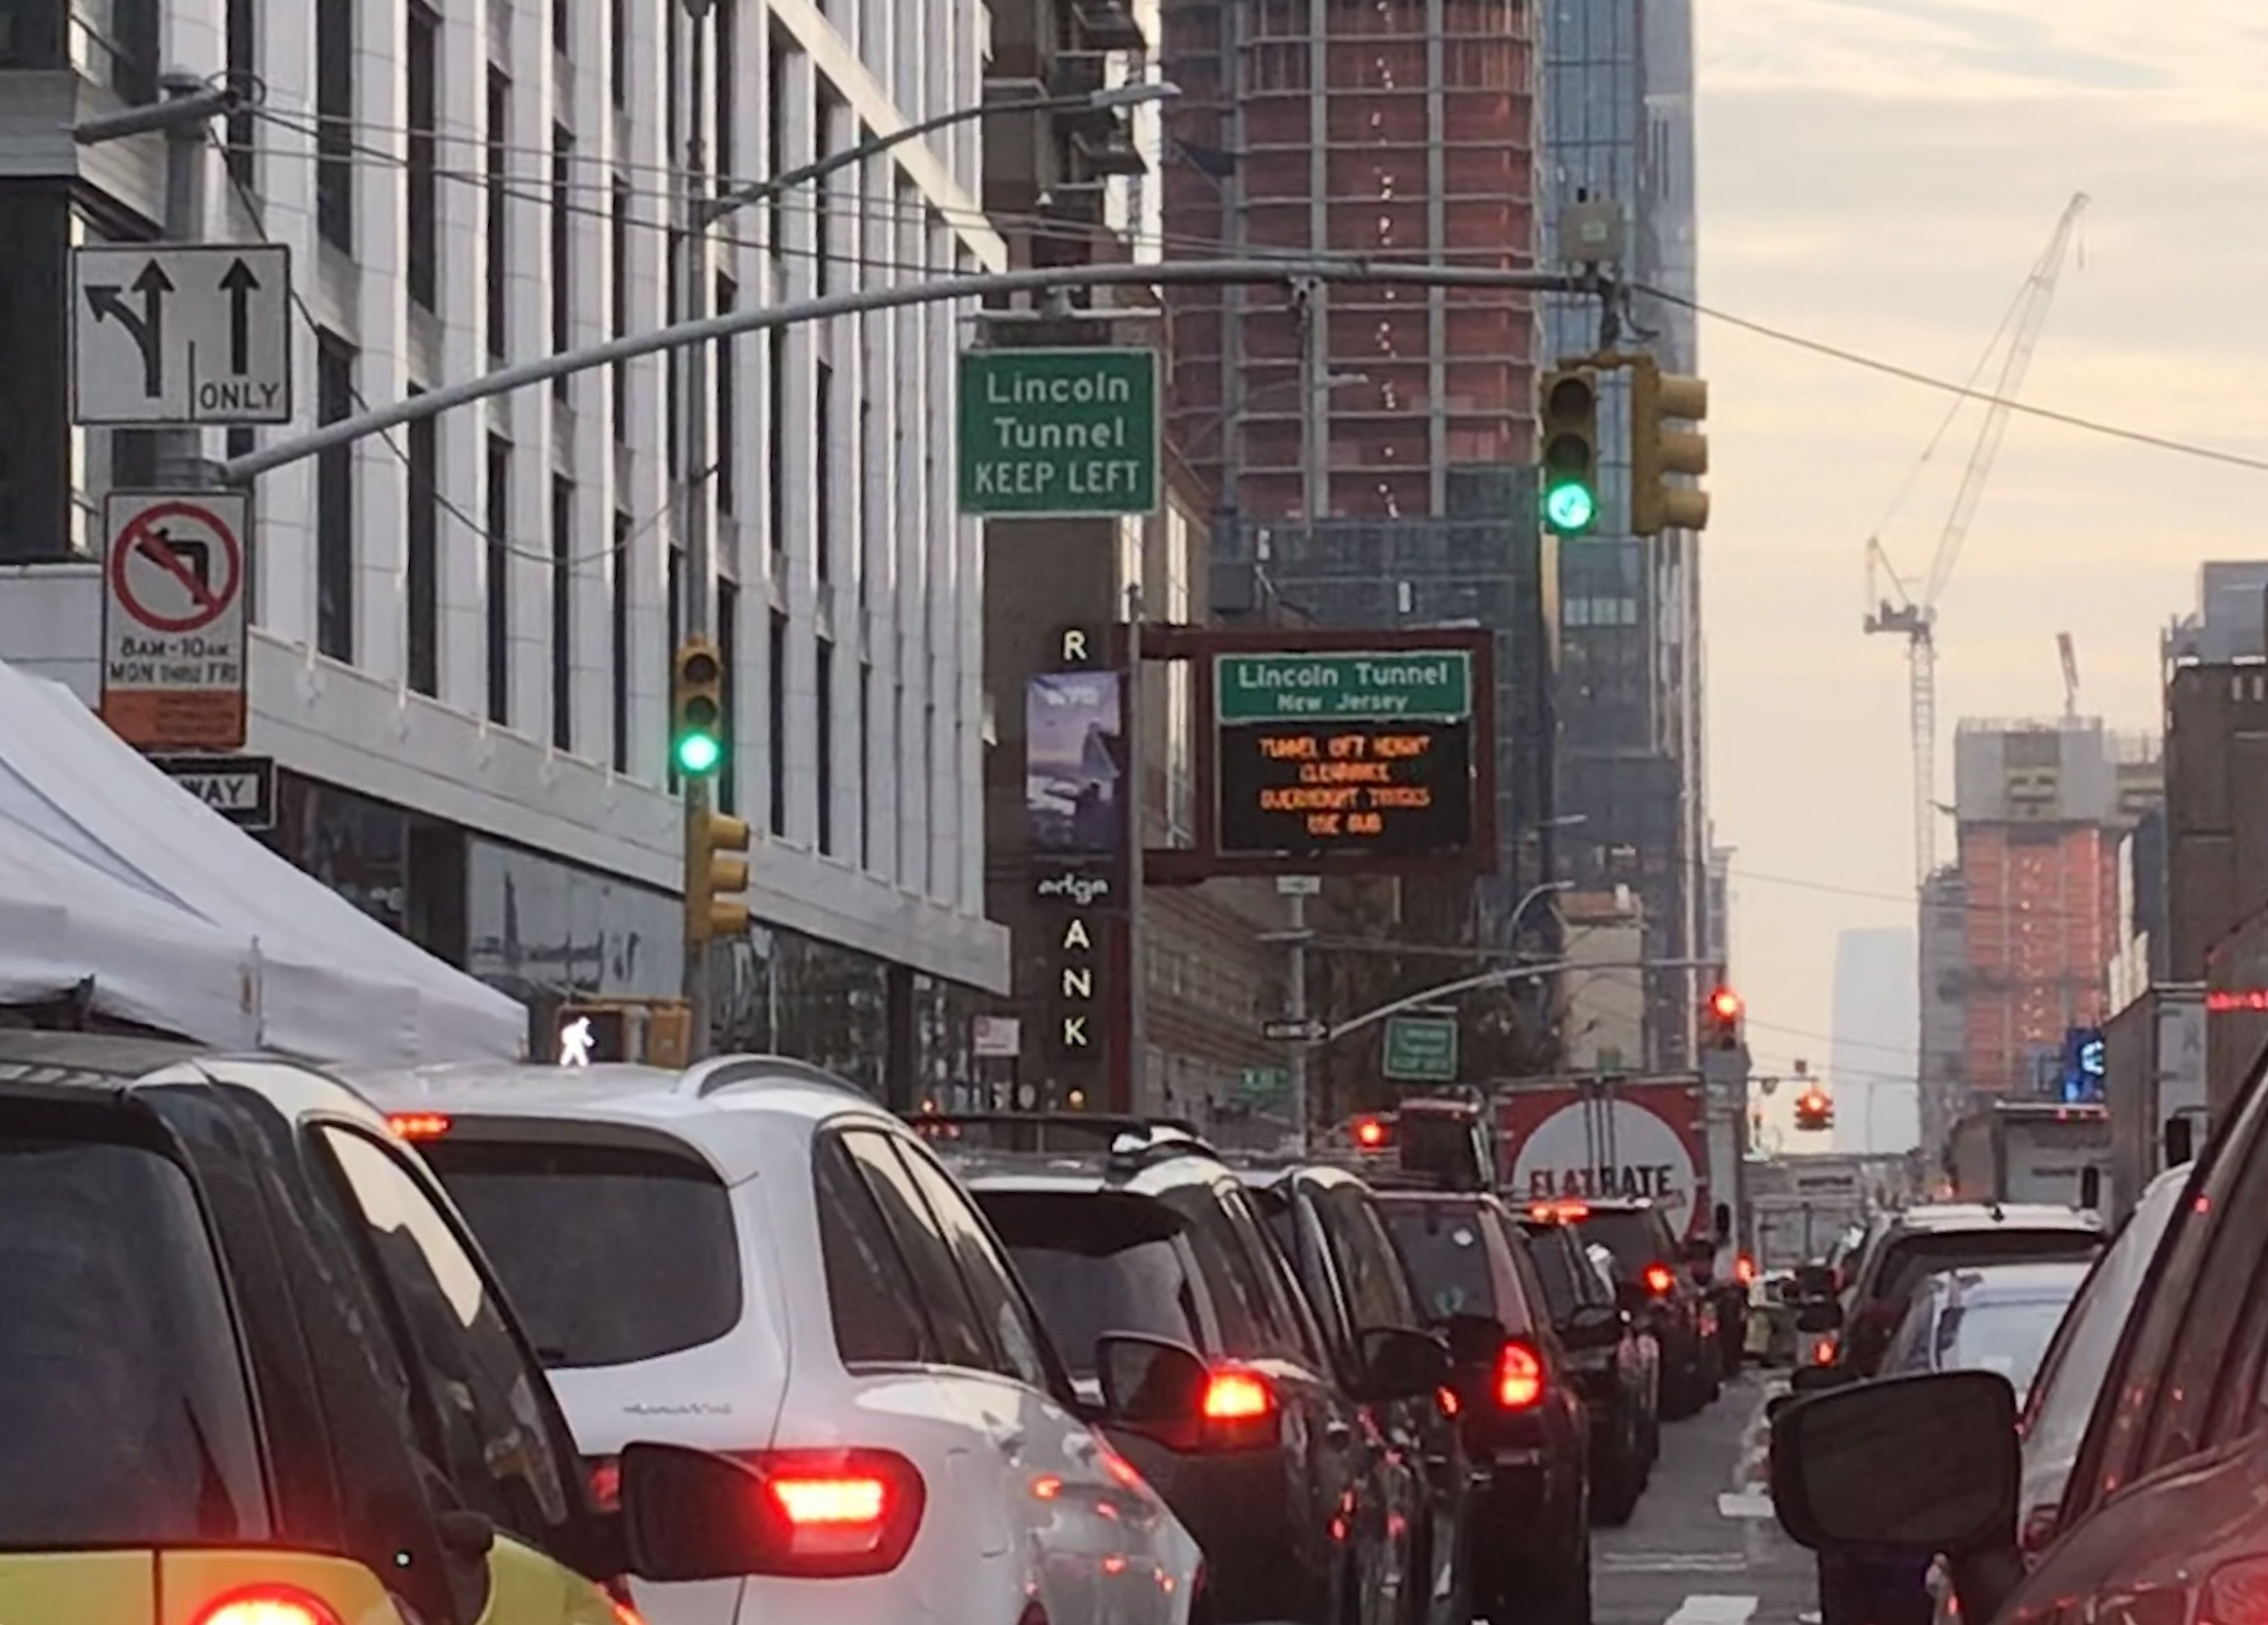

In [3]:
import tensorflow as tf
from IPython.display import Image
!mkdir /content/images/

# Upload image
URL = "https://raw.githubusercontent.com/m3gofriends/My-Machine-and-Deep-Learning-Template-main/main/Data/Image/traffic.jpg"
LOCAL_IMG_FILE = "/content/images/traffic.jpg"

tf.keras.utils.get_file(LOCAL_IMG_FILE, origin=URL) # Put the image on the URL to the specified path
Image(filename=LOCAL_IMG_FILE) # Show image

#Detect

In [4]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/images

detect: weights=['yolov5s.pt'], source=/content/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 49.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/images/traffic.jpg: 480x640 11 cars, 6 traffic lights, 17.7ms
Speed: 0.7ms pre-process, 17.7ms inference, 39.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


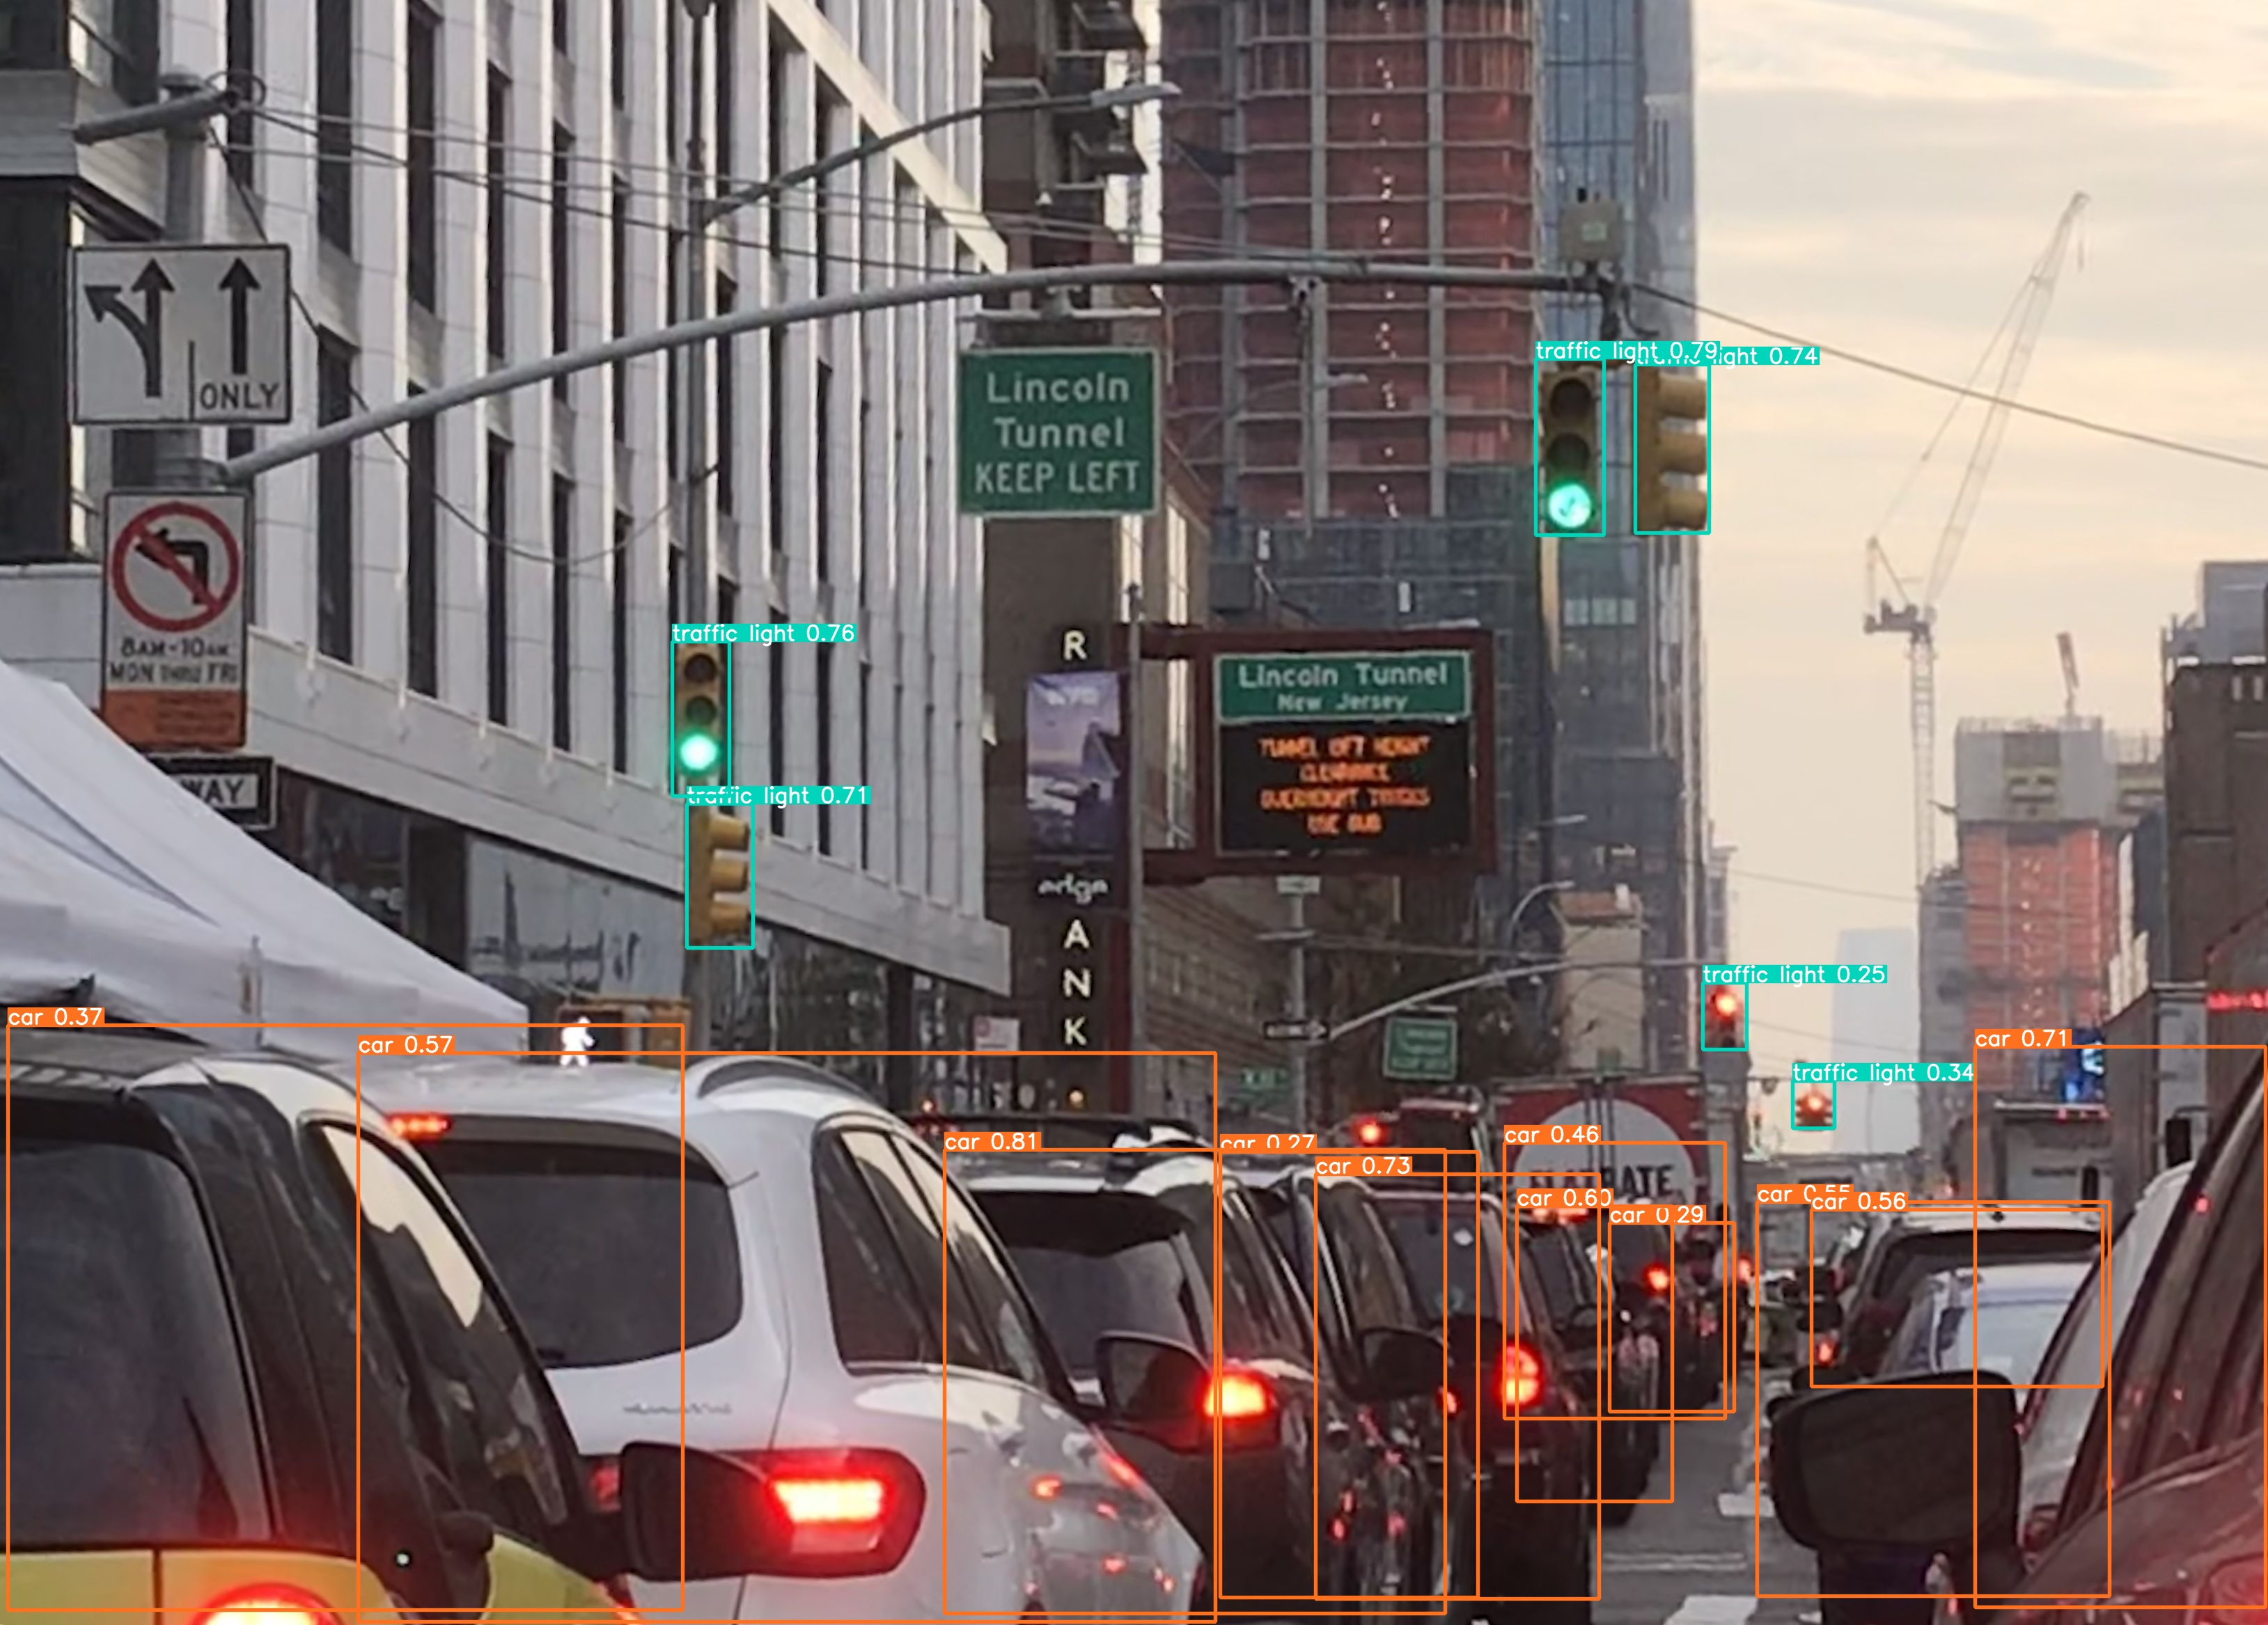

In [5]:
display.Image(filename='/content/yolov5/runs/detect/exp/traffic.jpg')

#Training my own weights

In [6]:
# The project has 2 labels
!cat "/content/YOLO_Mask/mask.yaml"

# 設定圖檔路徑
path: /content/YOLO_Mask  # 資料根目錄
train: /content/YOLO_Mask/train/images    # 訓練用資料集（相對於 path）
val: /content/YOLO_Mask/train/images      # 驗證用資料集（相對於 path）
test:                   # 測試用資料集（相對於 path，可省略）

# 物件類別設定
nc: 2  # 類別數量
names: ['mask', 'no_mask']  # 類別名稱

在左側依路徑yolov5/models/yolov5s.yaml該文件，點擊它。找到"nc: 80  # number of classes"，修改為"nc: 2  # number of classes"。

On the left side, follow the path yolov5/models/yolov5s.yaml to the file, click it. Find "nc: 80 # number of classes" and change it to "nc: 2 # number of classes".

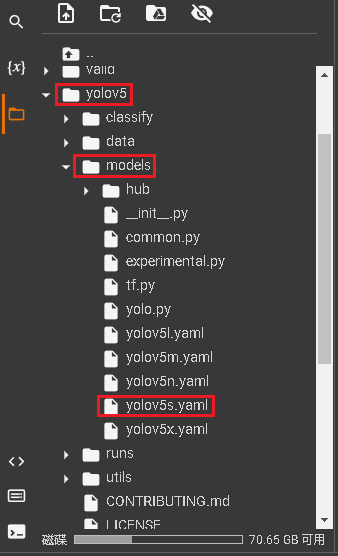
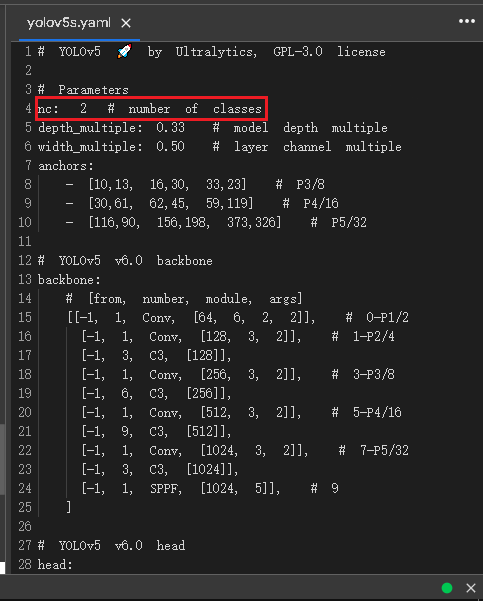

In [7]:
!python train.py --data /content/YOLO_Mask/mask.yaml --cfg /content/yolov5/models/yolov5s.yaml --weights '' --name Mask

train: weights=, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/YOLO_Mask/mask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Mask, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

#Detect my object

In [8]:
!python detect.py --weights /content/yolov5/runs/train/Mask/weights/best.pt --conf 0.5 --source /content/YOLO_Mask/train/images

detect: weights=['/content/yolov5/runs/train/Mask/weights/best.pt'], source=/content/YOLO_Mask/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/50 /content/YOLO_Mask/train/images/maksssksksss0.png: 480x640 (no detections), 12.1ms
image 2/50 /content/YOLO_Mask/train/images/maksssksksss1.png: 256x640 2 masks, 10.9ms
image 3/50 /content/YOLO_Mask/train/images/maksssksksss10.png: 640x512 1 mask, 11.7ms
image 4/50 /content/YOLO_Mask/train/images/maksssk

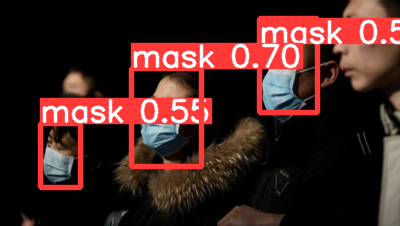

In [11]:
display.Image(filename='/content/yolov5/runs/detect/exp2/maksssksksss44.png')